# KAZ env  

Using cpu device


/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 1.84GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    exploration_rate | 0.194    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1720     |
|    time_elapsed     | 0        |
|    total_timesteps  | 848      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00599  |
|    n_updates        | 46       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1778     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1584     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00188  |
|    n_updates        | 92       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/supersuit/vector/sb3_vector_wrapper.py:52: UserWarning: PettingZoo environments do not take the `render(mode)` argument, to change rendering mode, re-initialize the environment using the `render_mode` argument.
  warnings.warn(
/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/pettingzoo/butterfly/knights_archers_zombies/knights_archers_zombies.py:799: UserWarning: WARN: You are calling render method without specifying any render mode.
  gymnasium.logger.warn(


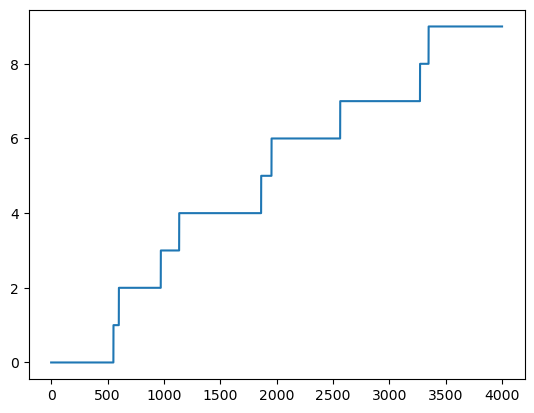

In [18]:
from pettingzoo.butterfly import knights_archers_zombies_v10
from pettingzoo.utils.conversions import aec_to_parallel
import supersuit as ss
from stable_baselines3 import DQN
import numpy as np
import matplotlib.pyplot as plt

# Charger l'environnement PettingZoo AEC (par défaut)
aec_env = knights_archers_zombies_v10.env()

# Convertir l'environnement AEC en ParallelEnv
parallel_env = aec_to_parallel(aec_env)

# Appliquer le wrapper 'black_death_v3' pour gérer les agents inactifs
parallel_env = ss.black_death_v3(parallel_env)

# Utiliser SuperSuit pour convertir l'environnement en un environnement Gym compatible
gym_env = ss.pettingzoo_env_to_vec_env_v1(parallel_env)
gym_env = ss.concat_vec_envs_v1(gym_env, 1, base_class='stable_baselines3')

# Initialiser le modèle DQN
model = DQN('MlpPolicy', gym_env, verbose=1)

# Entraîner l'agent
model.learn(total_timesteps=10000)

# Sauvegarder le modèle
model.save("dqn_knights_archers_zombies")

# Charger le modèle pour l'utiliser ou l'évaluer
model = DQN.load("dqn_knights_archers_zombies")

# Évaluer le modèle
env = knights_archers_zombies_v10.parallel_env()
env = ss.black_death_v3(env)
env = ss.pettingzoo_env_to_vec_env_v1(env)
env = ss.concat_vec_envs_v1(env, 1, base_class='stable_baselines3')
model.set_env(env)

obs = env.reset()
rewards = []
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done.any():
        obs = env.reset()

# Afficher les récompenses
plt.plot(np.cumsum(rewards))
plt.show()

# # Make a video of the trained model
# env = knights_archers_zombies_v10.parallel_env()
# env = ss.black_death_v3(env)
# env = ss.pettingzoo_env_to_vec_env_v1(env)
# env = ss.concat_vec_envs_v1(env, 1, base_class='stable_baselines3')
# model.set_env(env)
# ss.record_video(env, model, "dqn_knights_archers_zombies.mp4", video_length=1000, fps=10)

# # Afficher la vidéo


Using cpu device
Using cpu device
Using cpu device
Using cpu device
Episode 1


/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 2.16GB
  warnings.warn(
/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 2.17GB
  warnings.warn(


Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10


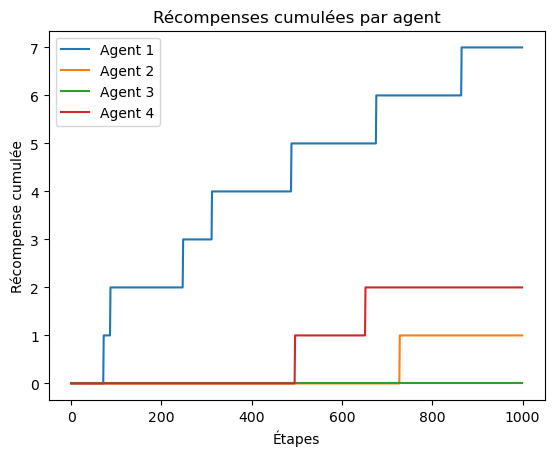

In [26]:
from pettingzoo.butterfly import knights_archers_zombies_v10
from pettingzoo.utils.conversions import aec_to_parallel
import supersuit as ss
from stable_baselines3 import DQN
import numpy as np
import matplotlib.pyplot as plt

# Charger l'environnement PettingZoo AEC (par défaut)
aec_env = knights_archers_zombies_v10.env()

# Convertir l'environnement AEC en ParallelEnv
parallel_env = aec_to_parallel(aec_env)

# Appliquer le wrapper 'black_death_v3' pour gérer les agents inactifs
parallel_env = ss.black_death_v3(parallel_env)

# Utiliser SuperSuit pour convertir l'environnement en un environnement Gym compatible
gym_env = ss.pettingzoo_env_to_vec_env_v1(parallel_env)
gym_env = ss.concat_vec_envs_v1(gym_env, 1, base_class='stable_baselines3')

# Initialiser les modèles DQN pour chaque agent
num_agents = gym_env.num_envs  # Récupérer le nombre d'agents à partir de l'environnement
models = [DQN('MlpPolicy', gym_env, verbose=1) for _ in range(num_agents)]

# Entraîner les agents
timesteps = 1000
for episode in range(10):  # Nombre d'épisodes d'entraînement
    print(f"Episode {episode + 1}")
    obs = gym_env.reset()
    done = np.array([False] * num_agents)

    for step in range(timesteps):
        actions = np.array([models[i].predict(obs[i])[0] for i in range(num_agents)])  # Prédire les actions pour chaque agent
        obs, rewards_batch, done, _ = gym_env.step(actions)  # Appliquer les actions dans l'environnement
        
        for i in range(num_agents):
            models[i].learn(total_timesteps=1)  # Mettre à jour chaque agent après chaque étape
        
        if done.any():
            obs = gym_env.reset()

# Sauvegarder les modèles
for i in range(num_agents):
    models[i].save(f"dqn_agent_{i + 1}_knights_archers_zombies")

# Évaluer les modèles
obs = gym_env.reset()
rewards = [[] for _ in range(num_agents)]  # Liste pour stocker les récompenses de chaque agent
done = np.array([False] * num_agents)

for _ in range(1000):
    actions = np.array([models[i].predict(obs[i])[0] for i in range(num_agents)])  # Prédire les actions pour chaque agent
    obs, rewards_batch, done, _ = gym_env.step(actions)  # Appliquer les actions dans l'environnement
    for i in range(num_agents):
        rewards[i].append(rewards_batch[i])  # Stocker les récompenses pour chaque agent
    if done.all():
        obs = gym_env.reset()

# Afficher les récompenses cumulées pour chaque agent
for i in range(num_agents):
    plt.plot(np.cumsum(rewards[i]), label=f'Agent {i + 1}')
plt.xlabel('Étapes')
plt.ylabel('Récompense cumulée')
plt.legend()
plt.title('Récompenses cumulées par agent')
plt.show()


Using cpu device
Using cpu device
Using cpu device
Using cpu device
Episode 1


/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 1.84GB
  warnings.warn(
/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 1.83GB
  warnings.warn(
/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 1.81GB
  warnings.warn(
/Users/angeleramauge/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.18GB > 1.80GB
  warnings.warn(


Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10


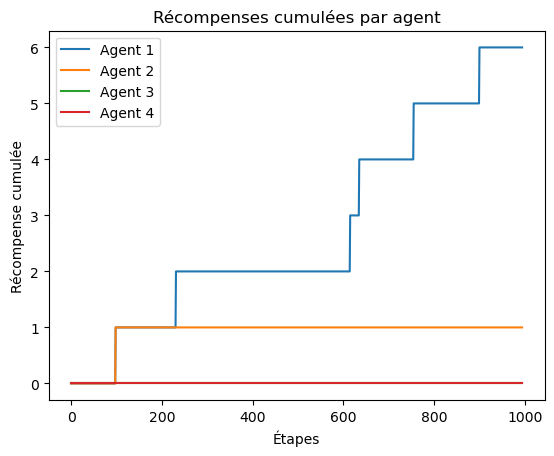

In [36]:
from pettingzoo.butterfly import knights_archers_zombies_v10
from pettingzoo.utils.conversions import aec_to_parallel
import supersuit as ss
from stable_baselines3 import DQN
import numpy as np
import matplotlib.pyplot as plt

# Charger l'environnement PettingZoo AEC (par défaut)
aec_env = knights_archers_zombies_v10.env()

# Convertir l'environnement AEC en ParallelEnv
parallel_env = aec_to_parallel(aec_env)

# Appliquer le wrapper 'black_death_v3' pour gérer les agents inactifs
parallel_env = ss.black_death_v3(parallel_env)

# Utiliser SuperSuit pour convertir l'environnement en un environnement Gym compatible
gym_env = ss.pettingzoo_env_to_vec_env_v1(parallel_env)
gym_env = ss.concat_vec_envs_v1(gym_env, 1, base_class='stable_baselines3')

# Initialiser les modèles DQN pour chaque agent
num_agents = gym_env.num_envs  # Récupérer le nombre d'agents à partir de l'environnement
models = [DQN('MlpPolicy', gym_env, verbose=1) for _ in range(num_agents)]

# Entraîner les agents
timesteps = 1000
for episode in range(10):  # Nombre d'épisodes d'entraînement
    print(f"Episode {episode + 1}")
    obs = gym_env.reset()
    done = np.array([False] * num_agents)

    for step in range(timesteps):
        actions = np.array([models[i].predict(obs[i])[0] if not done[i] else 0 for i in range(num_agents)])  # Prédire les actions pour chaque agent actif
        obs, rewards_batch, done, _ = gym_env.step(actions)  # Appliquer les actions dans l'environnement
        
        for i in range(num_agents):
            if not done[i]:  # Mettre à jour seulement si l'agent est actif
                models[i].learn(total_timesteps=1)  # Mettre à jour chaque agent après chaque étape
        
        if done.all():
            obs = gym_env.reset()  # Réinitialiser l'environnement si un agent est mort
            done = np.array([False] * num_agents)


# Sauvegarder les modèles
for i in range(num_agents):
    models[i].save(f"dqn_agent_{i + 1}_knights_archers_zombies")

# Évaluer les modèles
obs = gym_env.reset()
rewards = [[] for _ in range(num_agents)]  # Liste pour stocker les récompenses de chaque agent
done = np.array([False] * num_agents)

for _ in range(1000):
    actions = np.array([models[i].predict(obs[i])[0] if not done[i] else 0 for i in range(num_agents)])  # Prédire les actions pour chaque agent actif
    obs, rewards_batch, done, _ = gym_env.step(actions)  # Appliquer les actions dans l'environnement
    for i in range(num_agents):
        if not done[i]:  # Stocker les récompenses seulement si l'agent est actif
            rewards[i].append(rewards_batch[i])  # Stocker les récompenses pour chaque agent
    if done.all():  # Reset lorsque tous les agents sont terminés
        obs = gym_env.reset()
        

# Afficher les récompenses cumulées pour chaque agent
for i in range(num_agents):
    plt.plot(np.cumsum(rewards[i]), label=f'Agent {i + 1}')
plt.xlabel('Étapes')
plt.ylabel('Récompense cumulée')
plt.legend()
plt.title('Récompenses cumulées par agent')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


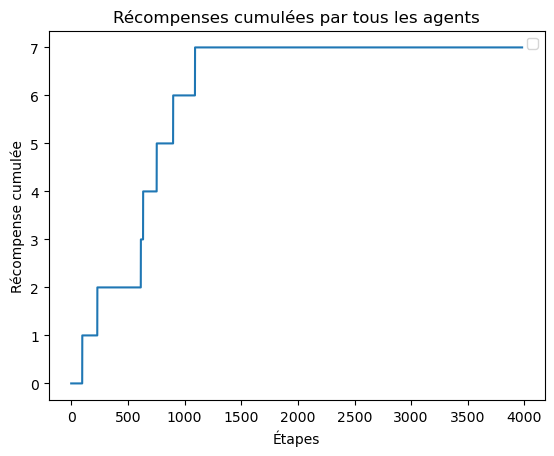

In [37]:
# Afficher les récompenses cumulées pour chaque agent
plt.plot(np.cumsum(rewards))
plt.xlabel('Étapes')
plt.ylabel('Récompense cumulée')
plt.legend()
plt.title('Récompenses cumulées par tous les agents')
plt.show()